# Projeto Mulheres Vítimas Versão 3
## Classificação de municípios quanto ao risco de violência contra mulher


**João L. S. Júnior**\
Universidade Federal do Pará - UFPA \
Laboratório de Pesquisa Operacional - LPO\
Instituto Federal de Educação, Ciência e Tecnologia do Pará - IFPA\
Copyright(c) 2023.


---

Comunicação com API IBGE

In [1]:
from generators.IBGE_DataFetcher import IBGEDataFetcher

state = 'pa'  # Exemplo: Pará
fetcher = IBGEDataFetcher(state)
df_munic = fetcher.fetch_municipalites_info()
df_munic

,id,localidade,IAP,IDH,PIB,GINI
0,150010,Abaetetuba,0.45,0.628,9458.72,0.60
1,150013,Abel Figueiredo,0.47,0.622,11420.76,0.63
2,150020,Acará,0.12,0.506,13582.97,0.64
3,150030,Afuá,0.12,0.489,9405.70,0.61
4,150034,Água Azul do Norte,0.27,0.564,15819.85,0.63
...,...,...,...,...,...,...
139,150815,Uruará,0.15,0.589,13401.03,0.62
140,150820,Vigia,0.32,0.617,7216.02,0.64
141,150830,Viseu,0.47,0.515,7952.36,0.63
142,150835,Vitória do Xingu,0.00,0.596,270414.24,0.62


In [2]:
# if state == 'pa':
#     df_munic.drop(73, inplace=True)

In [3]:
df_munic.loc[73]

id                      150475
localidade    Mojuí dos Campos
IAP                        0.0
IDH                        0.0
PIB                   10580.49
GINI                       0.0
Name: 73, dtype: object

In [4]:
# Suponha que você tenha um DataFrame df
# df = pd.DataFrame(...)

# Definindo as colunas nas quais você está interessado
colunas_interesse = ['IAP', 'IDH', 'GINI']

# Escolhendo a linha que você deseja alterar (por exemplo, a linha com índice 0)
indice_linha = 73

# Criando um subconjunto do DataFrame sem a linha de índice 73
df_subconjunto = df_munic.drop(index=indice_linha)

# Encontrando o menor valor para cada coluna
valores_minimos = df_subconjunto[colunas_interesse].min()


# Atribuindo os valores mínimos à linha selecionada
df_munic.loc[indice_linha, colunas_interesse] = valores_minimos

# Agora, a linha especificada tem os menores valores de cada coluna nas colunas selecionadas

df_munic.loc[73]

id                      150475
localidade    Mojuí dos Campos
IAP                        0.0
IDH                      0.418
PIB                   10580.49
GINI                      0.51
Name: 73, dtype: object

In [5]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

df_munic_normalized = pd.DataFrame()

# Inicialize o MinMaxScaler
scaler = MinMaxScaler()

# Selecione as colunas a serem normalizadas (exceto 'id' e 'nome')
columns_to_normalize = ['IAP', 'IDH', 'PIB', 'GINI']


# Aplique o MinMaxScaler às colunas selecionadas
df_munic_normalized[columns_to_normalize] = scaler.fit_transform(df_munic[columns_to_normalize])

# Resultado normalizado
print(df_munic_normalized.loc[73])

IAP     0.00000
IDH     0.00000
PIB     0.01832
GINI    0.00000
Name: 73, dtype: float64


In [6]:
df_munic_normalized = df_rounded = df_munic_normalized.round(2)

df_munic_normalized

,IAP,IDH,PIB,GINI
0,0.67,0.64,0.01,0.56
1,0.70,0.62,0.02,0.75
2,0.18,0.27,0.03,0.81
3,0.18,0.22,0.01,0.63
4,0.40,0.45,0.04,0.75
...,...,...,...,...
139,0.22,0.52,0.03,0.69
140,0.48,0.61,0.01,0.81
141,0.70,0.30,0.01,0.75
142,0.00,0.54,0.94,0.69


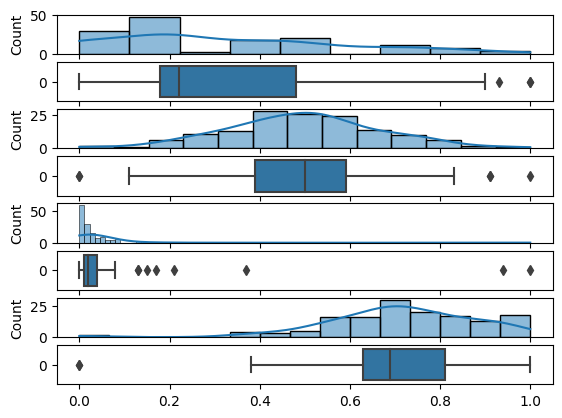

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_munic_normalized


p1 = df['IAP']
p2 = df['IDH']
p3 = df['PIB']
p4 = df['GINI']

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8)
sns.histplot(p1, kde=True, ax=ax1)
sns.boxplot(p1, orient="h", ax=ax2)
sns.histplot(p2, kde=True, ax=ax3)
sns.boxplot(p2, orient="h", ax=ax4)
sns.histplot(p3, kde=True, ax=ax5)
sns.boxplot(p3, orient="h", ax=ax6)
sns.histplot(p4, kde=True, ax=ax7)
sns.boxplot(p4, orient="h", ax=ax8)
#plt.xlim(-1, 1)
plt.show()

In [8]:
def print_limits(dataset: pd.DataFrame) -> np.array:

    r = []
    r.append(df.quantile(0.25))
    r.append(df.quantile(0.75))
    r.append(df.quantile(0.90))

    return np.array(r)

In [9]:
#B = print_limits(scaled_df.iloc[:,2:6]).tolist()
B = print_limits(df).tolist()

In [10]:
B

[[0.18, 0.39, 0.01, 0.63], [0.48, 0.5925, 0.04, 0.81], [0.7, 0.73, 0.07, 0.94]]

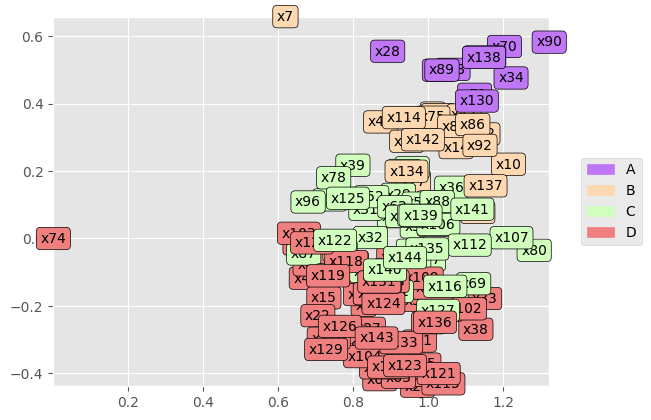

In [11]:

Q = [0.0]*4
#P = [0.55]*4
#P = [0.18, 0.18, 0.08, 0.15]
P = [0.0]*4
V = [0.0]*4
W = [0.6,     0.0,      0.0,     0.0]


from pyDecision.algorithm import electre_tri_b

classification = electre_tri_b(np.array(df), W , Q , P , V , B, cut_level = 0.65, verbose = False, rule = 'pc', graph = True)

In [12]:
df_munic_classified = df_munic.iloc[:,:2]
df_munic_classified[columns_to_normalize] = df_munic_normalized
df_munic_classified['CLASS'] = classification
df_munic_classified.to_parquet("datasets/df_classified_pa.parquet")
df_munic_classified

,id,localidade,IAP,IDH,PIB,GINI,CLASS
0,150010,Abaetetuba,0.67,0.64,0.01,0.56,1
1,150013,Abel Figueiredo,0.70,0.62,0.02,0.75,1
2,150020,Acará,0.18,0.27,0.03,0.81,3
3,150030,Afuá,0.18,0.22,0.01,0.63,3
4,150034,Água Azul do Norte,0.40,0.45,0.04,0.75,2
...,...,...,...,...,...,...,...
139,150815,Uruará,0.22,0.52,0.03,0.69,2
140,150820,Vigia,0.48,0.61,0.01,0.81,2
141,150830,Viseu,0.70,0.30,0.01,0.75,1
142,150835,Vitória do Xingu,0.00,0.54,0.94,0.69,3


In [13]:
# Calcula a contagem de cada classificação
class_counts = df_munic_classified['CLASS'].value_counts().reset_index()
class_counts.columns = ['CLASS', 'count']

class_counts

,CLASS,count
0,3,61
1,2,52
2,1,19
3,0,12


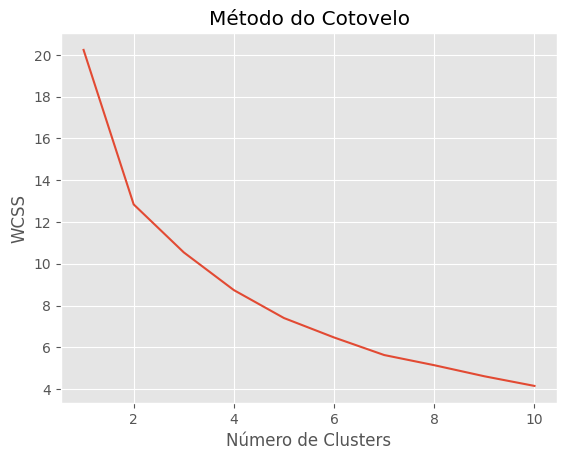

In [96]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para armazenar os valores de WCSS
wcss = []


dataset = df.values

# Definindo o intervalo de valores de K para testar
# Você pode ajustar o range conforme necessário
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Within-cluster Sum of Squares
plt.show()

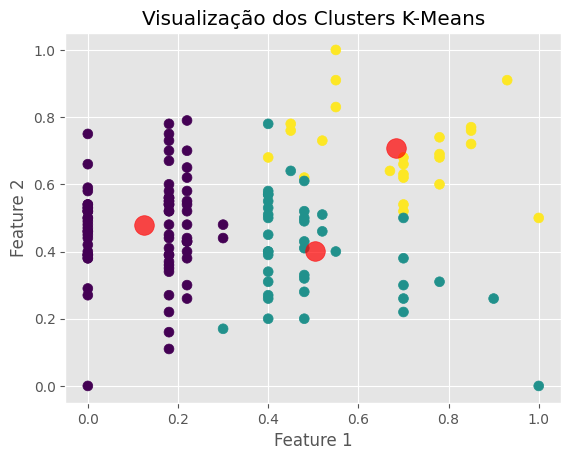

In [92]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Supondo que dataset seja um DataFrame ou array do numpy
# dataset = df
number_of_classes = 3

# Aplicando K-means
kmeans = KMeans(n_clusters=number_of_classes, init='k-means++', n_init=10, max_iter=200, random_state=42)
y_kmeans = kmeans.fit_predict(dataset)

# Plotando os pontos e os centros dos clusters
plt.scatter(dataset[:, 0], dataset[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)  # Centros dos clusters
plt.title('Visualização dos Clusters K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [109]:
# Required Libraries
import numpy as np
from dashboard.electre_tree import tree_e_tri_b, util_e_tri_b
from sklearn.model_selection import train_test_split

dataset = df

countries = df_munic['localidade']
X         = dataset.values

# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
#target    = classification
target    = []

cut_level = [0.5, 1.0]
Q         = [] #[0.15, 0.12, 0.11, 0.12]
P         = [] #[0.22, 0.14, 0.17, 0.24]
V         = [] #[0.44, 0.27, 0.22, 0.35]
W         = []
B         = []
models    = 10 # 200

# Acc = 8.6
# Parameters - GA
elite       = 2 #     2
eta         = 1 #     1
mu          = 2 #     1
size        = 30 #    15
rate        = 0.2 #  0.02
generations = 30 #    30
samples     = 0.10 #  10




In [110]:

models = tree_e_tri_b.tree_electre_tri_b(
    X, 
    target_assignment = target, 
    W = W, 
    Q = Q, 
    P = P, 
    V = V, 
    B = B, 
    cut_level = cut_level, 
    rule = rule, 
    number_of_classes = classes, 
    elite = elite, 
    eta = eta, mu = mu, 
    population_size = size, 
    mutation_rate = rate, 
    generations = generations, 
    samples = samples, 
    number_of_models = models)   



Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


Salva o modelo treinado

In [78]:
# import pickle

# # Salvando a lista em um arquivo
# with open('datasets/models_treinado_acc_84.pkl', 'wb') as f:
#     pickle.dump(models, f)



In [79]:
# Recuperando a lista do arquivo
# with open('datasets/models_treinado_acc_84.pkl', 'rb') as f:
#     lista_recuperada = pickle.load(f)

# print(lista_recuperada)


In [111]:
# Predict
prediction, solutions = tree_e_tri_b.predict(models, X, verbose = False, rule = rule)

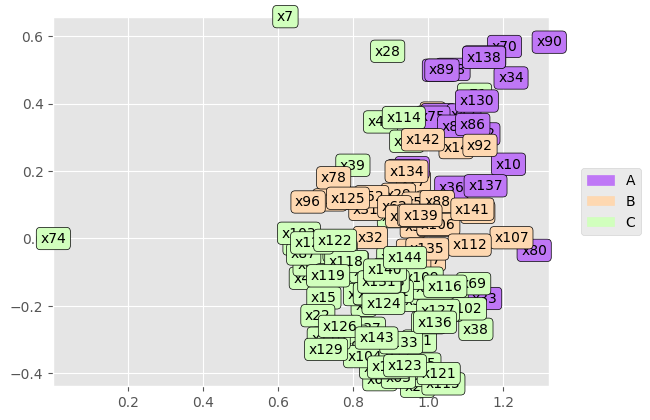

In [112]:
# Plot - Tree Model
util_e_tri_b.plot_points(X, prediction)

In [113]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes) 

print('Inferências: ')
print('W:', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
  print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
print('Lambda Cutoff: ', round(cut_mean,  2))
print('Accuracy: ',      round(acc_mean,  2))

Inferências: 
W: [0.75 0.58 0.24 0.27]
Q:  [0.01 0.15 0.01 0.09]
P:  [0.14 0.22 0.05 0.18]
V:  [0.34 0.41 0.07 0.35]
b1:  [0.28 0.32 0.07 0.65]
b2:  [0.51 0.68 0.09 0.71]
Lambda Cutoff:  0.92
Accuracy:  0.79


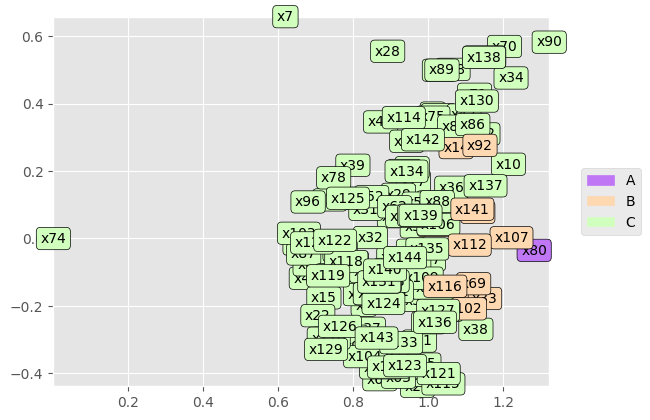

In [108]:
# Plot - Elicitated Parameters
# with open('datasets/models_treinado_acc_84.pkl', 'rb') as f:
#     models_saved = pickle.load(f)

# models = models_saved

e_tri = util_e_tri_b.electre_tri_b(X, W = w_mean, Q = q_mean, P = p_mean, V = v_mean, B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True)

In [84]:
len(e_tri)

144

In [85]:
# Plot Tree Model - Decision Boundaries
#tree_e_tri_b.plot_decision_boundaries(X, models)  

In [86]:
# # Plot Mean Model - Decision Boundaries  (Limites de Decisão)
# model_mean = []
# model_mean.append([w_mean, acc_mean, [], [], [], b_mean, cut_mean, [], [], q_mean, p_mean, v_mean])
# tree_e_tri_b.plot_decision_boundaries(X, model_mean)